In [ ]:
#Code to install imbalanced-learn. Credits: Ernest

# 1. Download imbalanced-learn from https://files.pythonhosted.org/packages/e5/4c/7557e1c2e791bd43878f8c82065bddc5798252084f26ef44527c02262af1/imbalanced_learn-0.4.3-py3-none-any.whl 
# 2. Add it to the part where we add datasets

# import os, pandas as pd
# print(os.environ['DSX_PROJECT_DIR']+'/datasets/imbalanced_learn-0.4.3-py3-none-any.whl')
# !pip install --user '/user-home/1022/DSX_Projects/Naive Baes/datasets/imbalanced_learn-0.4.3-py3-none-any.whl'

In [2]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm as cm

from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, VotingClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, average_precision_score
from sklearn.metrics import precision_recall_curve, roc_curve, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

import seaborn as sns 

from imblearn.over_sampling import SMOTE

In [3]:
# #Code to import dataset
# df = pd.read_csv(os.environ['DSX_PROJECT_DIR']+'/datasets/creditcard-training.csv')
# df.head()

In [4]:
df = pd.read_csv('data/creditcard-training.csv')

# Data Exploration

In [5]:
#Get shape
df.shape

(227844, 32)

In [6]:
#Print head
df.head()

,Seconds since reference time,Amount,"Fraud? (1: Fraud, 0: No Fraud)",Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,...,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29
0,0,149.62,0,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,...,0.462388,0.239599,0.098698,-6.399372,-0.311169,-0.991390,-0.617801,-0.551600,0.090794,0.363787
1,0,2.69,0,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,...,-0.082361,-0.078803,0.085102,13.786441,-0.143772,0.489095,1.065235,1.612727,-0.166974,-0.255425
2,1,378.66,0,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,...,1.800499,0.791461,0.247676,-10.515321,-0.165946,0.717293,0.066084,0.624501,0.207643,-1.514654
3,1,123.50,0,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,...,1.247203,0.237609,0.377436,2.961038,-0.287924,0.507757,0.178228,-0.226487,-0.054952,-1.387024
4,2,69.99,0,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,...,0.095921,0.592941,-0.270533,2.751346,-1.119670,1.345852,0.538196,-0.822843,0.753074,0.817739


In [7]:
#Get NAs 
df[df.isnull().any(axis=1)].head()

,Seconds since reference time,Amount,"Fraud? (1: Fraud, 0: No Fraud)",Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,...,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29
10,10,7.80,0,0.230930,0.031967,0.253415,0.854344,NaN,-0.387226,-0.009302,...,-0.629152,-1.423236,0.048456,-13.640428,-0.095045,-0.513947,-0.671440,1.199644,1.626659,-1.720408
16,12,12.99,0,0.354574,-0.246635,-0.009212,-0.595912,-0.575682,NaN,-0.024612,...,0.288069,-0.586057,0.189380,8.579468,-0.468647,0.708380,0.936708,-0.450311,-0.267975,0.782333
25,22,26.43,0,-0.211668,-0.333321,0.010751,-0.488473,0.505751,NaN,-0.403639,...,-0.959537,0.543985,-0.104627,-10.985595,-0.279797,-0.655233,-0.180523,-0.856566,0.149451,0.475664
28,23,33.00,0,0.076804,-1.405919,0.775592,-0.942889,NaN,0.097308,0.077237,...,-0.200331,0.740228,-0.029247,-5.123601,-0.086324,0.635954,0.786796,-0.012142,-0.346188,-0.593392
42,33,14.80,0,0.235545,-1.347811,0.504648,-0.798405,0.759710,NaN,-0.087329,...,0.119168,0.850893,-0.176267,5.560997,-0.365439,0.481917,0.398299,-0.387003,0.148455,-0.243501


There are missing values so we will use Sklearn Imputer to impute

## Handle Missing Values

In [8]:
#Use sklearn Impute to impute missing values
features = df.values
imp = SimpleImputer(missing_values = np.nan, strategy='mean')

#Only feature 5 and feature 6 have NaN
features[:,[7,8]] = imp.fit_transform(features[:,[7,8]])

df1 = pd.DataFrame(features)
df1.columns = df.columns
df = df1
df[df.isnull().any(axis=1)]

,Seconds since reference time,Amount,"Fraud? (1: Fraud, 0: No Fraud)",Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,...,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29


In [9]:
#Rename the fraud column
df = df.rename( {'Fraud? (1: Fraud, 0:  No Fraud)' : 'Fraud'}, axis=1)
df.head()

,Seconds since reference time,Amount,Fraud,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,...,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29
0,0.0,149.62,0.0,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,...,0.462388,0.239599,0.098698,-6.399372,-0.311169,-0.991390,-0.617801,-0.551600,0.090794,0.363787
1,0.0,2.69,0.0,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,...,-0.082361,-0.078803,0.085102,13.786441,-0.143772,0.489095,1.065235,1.612727,-0.166974,-0.255425
2,1.0,378.66,0.0,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,...,1.800499,0.791461,0.247676,-10.515321,-0.165946,0.717293,0.066084,0.624501,0.207643,-1.514654
3,1.0,123.50,0.0,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,...,1.247203,0.237609,0.377436,2.961038,-0.287924,0.507757,0.178228,-0.226487,-0.054952,-1.387024
4,2.0,69.99,0.0,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,...,0.095921,0.592941,-0.270533,2.751346,-1.119670,1.345852,0.538196,-0.822843,0.753074,0.817739


In [10]:
#Get difference in means between Fraud and not-fraud
df.groupby('Fraud').mean()

,Seconds since reference time,Amount,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,...,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29
Fraud,,,,,,,,,,,,,,,,,,,,,
0.0,79064.020002,90.761453,0.049387,0.002841,0.028799,-0.018164,-0.008677,0.009279,-0.007071,-0.022976,...,0.033086,-0.015406,0.002776,0.026436,0.045807,0.016831,-0.032826,0.068994,0.009538,0.007167
1.0,67308.333333,125.656379,-0.098209,-4.559229,-7.423533,-2.589217,0.761240,0.371774,0.765659,0.013088,...,-1.357987,-6.264641,0.663762,0.613894,-7.024019,-0.048627,-6.685076,4.046820,-6.135121,-2.696376


## Feature Selection

In [11]:
# Create subsample

df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Fraud'] == 1]
non_fraud_df = df.loc[df['Fraud'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
df_sample = normal_distributed_df.sample(frac=1, random_state=42)

df_sample.shape

(909, 32)

### Correlation Matrix

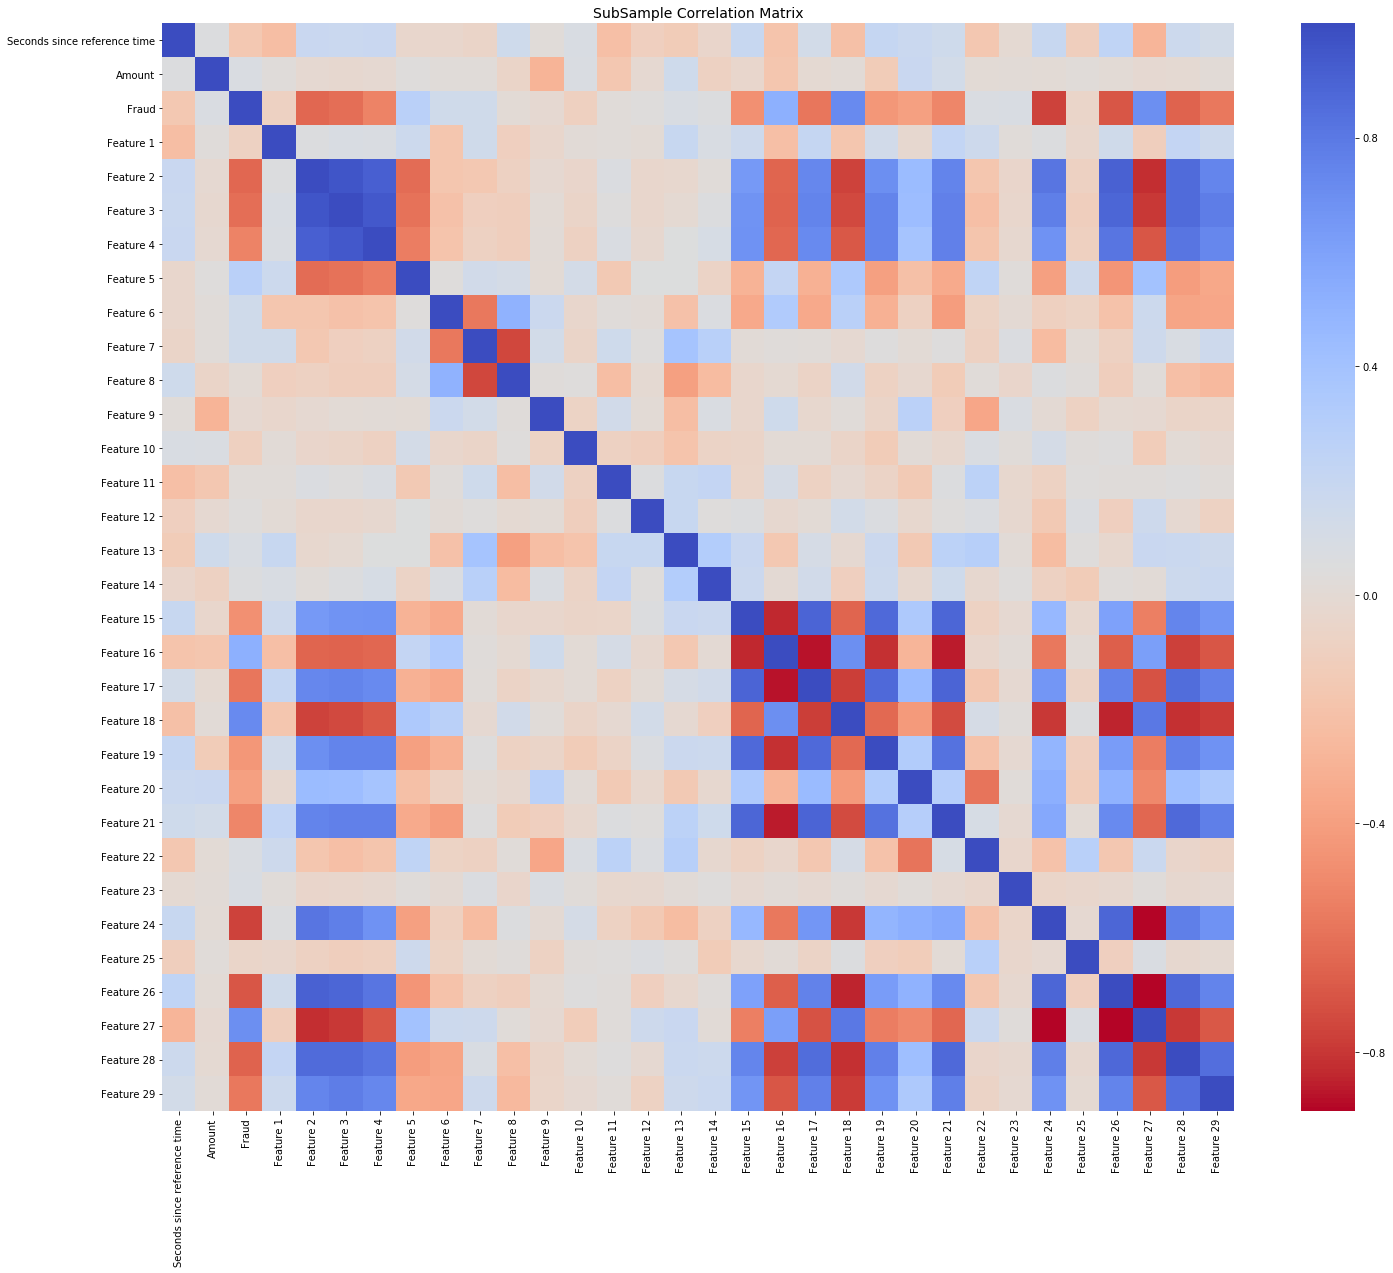

In [12]:
f, ax1 = plt.subplots(1, 1, figsize=(24,20))

sub_sample_corr = df_sample.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title('SubSample Correlation Matrix', fontsize=14)
plt.show()

<b>Negative Correlations</b>: Features (7 and 8), (15 and 16), (16 and 17), (16 and 21), (24 and 27), (26 and 27) are negatively correlated. <br/>
<b>Positive Correlations</b>:Features (2,3, and 4), (2 and 26), (15 and 21) are positively correlated. Notice how the higher these values are, the more likely the end result will be a fraud transaction.

There are quite a few variables with a huge difference between the fraudulent and non-fraudulent data 

In [13]:
#Get number of fraud and not fraud values
fraud_rows = df['Fraud'].value_counts()
total_rows = df.shape[0]
percentage_fraud = fraud_rows[1]/total_rows

print("Fraud rows: ", fraud_rows[1])
print("Total rows: ", total_rows)
print("Percentage rows: ", percentage_fraud)

Fraud rows:  417
Total rows:  227844
Percentage rows:  0.0018301996102596514


<div class="alert alert-danger">
Since the dataset is quite imbalanced (fraud vs non-fraud), we will be using <b>SMOTE</b> to create some synthetic observations 
</div>

In [14]:
#Function to plot data. Will be used later
def plot_data(X, y):
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.legend()
    return plt.show()

In [15]:
#We will be using SMOTE only on the training dataset. Thus, we need to split now
y = df['Fraud']
X = df.drop('Fraud', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

C:\Users\smart\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


# Data Resampling

In [16]:
method = SMOTE(kind='regular')

# Apply resampling to the training data only
X_resampled, y_resampled = method.fit_sample(X_train, y_train)

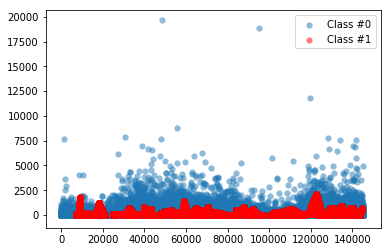

numpy.ndarray

In [17]:
plot_data(X_resampled, y_resampled)
type(X_resampled)

In [18]:
print("Before resampling")
print(pd.value_counts(pd.Series(y)))

# Print the value_counts
print("After resampling")
print(pd.value_counts(pd.Series(y_resampled)))

Before resampling
0.0    227427
1.0       417
Name: Fraud, dtype: int64
After resampling
1.0    159189
0.0    159189
dtype: int64


## Models to detect Fraud

### Random Forest

Random Forest before resampling:

In [19]:
model_rf = RandomForestClassifier(random_state=5)

# Fit the model to our resampled dataset
model_rf.fit(X_train, y_train)

# Obtain predictions from the test data 
predicted = model_rf.predict(X_test)

# Print the accuracy performance metric
# print(accuracy_score(y_test, predicted))

# Predict probabilities
probs = model_rf.predict_proba(X_test)

# Print the ROC curve, classification report and confusion matrix
print(roc_auc_score(y_test, probs[:,1]))
print(classification_report(y_test, predicted))
print(confusion_matrix(y_test, predicted))
print("F SCORE", f1_score(y_test, predicted))

C:\Users\smart\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9350020238495893
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     68238
         1.0       0.91      0.79      0.85       116

   micro avg       1.00      1.00      1.00     68354
   macro avg       0.96      0.90      0.92     68354
weighted avg       1.00      1.00      1.00     68354

[[68229     9]
 [   24    92]]
F SCORE 0.8479262672811061


In [42]:
tup = []
for i,j in zip(X.columns, model_rf.feature_importances_):
    tup.append((i, j))

sorted(tup, key=lambda x: x[1], reverse=True)


[('Feature 26', 0.18021625355976575),
 ('Feature 3', 0.16760834699804197),
 ('Feature 28', 0.14013433395426195),
 ('Feature 27', 0.08821419904414651),
 ('Feature 24', 0.05865519940449724),
 ('Feature 29', 0.049805432737448606),
 ('Feature 2', 0.026879626074370517),
 ('Feature 21', 0.023230713674982282),
 ('Feature 19', 0.021976285084133674),
 ('Feature 18', 0.020752694518351877),
 ('Feature 7', 0.015855748494071068),
 ('Feature 6', 0.01564406383849776),
 ('Amount', 0.015264720541129193),
 ('Feature 12', 0.015155581217523532),
 ('Feature 25', 0.01390075546904113),
 ('Feature 13', 0.01275105325426856),
 ('Feature 4', 0.012496781329840195),
 ('Feature 5', 0.01187512543545524),
 ('Feature 20', 0.011745897760877562),
 ('Feature 17', 0.011117152594095703),
 ('Feature 1', 0.010665202789193152),
 ('Feature 10', 0.010500495623472026),
 ('Feature 15', 0.009765765798161422),
 ('Feature 16', 0.00826873017634215),
 ('Feature 8', 0.008074691200303664),
 ('Feature 22', 0.008012635088223566),
 ('Featu

Random Forest after resampling

In [20]:
# Define the model as the random forest
model_rf_re = RandomForestClassifier(random_state=5)

# Fit the model to our resampled dataset
model_rf_re.fit(X_resampled, y_resampled)

# Obtain predictions from the test data 
predicted = model_rf_re.predict(X_test)

# Predict probabilities
probs = model_rf_re.predict_proba(X_test)

# Print the ROC curve, classification report and confusion matrix
print(roc_auc_score(y_test, probs[:,1]))
print(classification_report(y_test, predicted))
print(confusion_matrix(y_test, predicted))
print("F SCORE", f1_score(y_test, predicted))

C:\Users\smart\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.942287187541374
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     68238
         1.0       0.83      0.83      0.83       116

   micro avg       1.00      1.00      1.00     68354
   macro avg       0.91      0.91      0.91     68354
weighted avg       1.00      1.00      1.00     68354

[[68218    20]
 [   20    96]]
F SCORE 0.8275862068965517


In [55]:
tup = []
for i,j in zip(X.columns, model_rf_re.feature_importances_):
    tup.append((i, j))

tup = sorted(tup, key=lambda x: x[1], reverse=True)
print(tup)
remove_names = [i[0] for i in tup[-1:-6:-1]]
remove_names

[('Feature 28', 0.34807218024088693), ('Feature 26', 0.210128777140241), ('Feature 3', 0.10727824145939743), ('Feature 18', 0.057319857577183275), ('Feature 24', 0.05505686899537672), ('Feature 29', 0.04092082045407498), ('Feature 15', 0.034339512164627425), ('Feature 27', 0.026003530461241264), ('Feature 17', 0.013029067872721307), ('Feature 16', 0.009596723233492954), ('Feature 2', 0.009303452042357892), ('Feature 22', 0.007472454224401506), ('Feature 7', 0.007194109059909794), ('Feature 25', 0.007005246961063626), ('Feature 4', 0.005980877414083293), ('Seconds since reference time', 0.005940875014157769), ('Feature 21', 0.005635575837134693), ('Amount', 0.005133596608404689), ('Feature 5', 0.0043961754631806444), ('Feature 1', 0.004315812201712734), ('Feature 9', 0.004172794566552077), ('Feature 12', 0.004103711788744659), ('Feature 11', 0.003660886040038824), ('Feature 20', 0.0035800689017811173), ('Feature 6', 0.003455663145126512), ('Feature 14', 0.003415321915914247), ('Feature 

['Feature 13', 'Feature 19', 'Feature 10', 'Feature 23', 'Feature 8']

### Logistic Regression

In [21]:
# Continue fitting the model and obtain predictions
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

# Get your performance metrics
predicted = model_lr.predict(X_test)

# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)
print("F SCORE", f1_score(y_test, predicted))

C:\Users\smart\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     68238
         1.0       0.75      0.68      0.71       116

   micro avg       1.00      1.00      1.00     68354
   macro avg       0.88      0.84      0.86     68354
weighted avg       1.00      1.00      1.00     68354

Confusion matrix:
 [[68212    26]
 [   37    79]]
F SCORE 0.7149321266968326


In [22]:
# Continue fitting the model and obtain predictions
model_lr_re = LogisticRegression()
model_lr_re.fit(X_resampled, y_resampled)

# Get your performance metrics
predicted = model_lr_re.predict(X_test)

# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)
print("F SCORE", f1_score(y_test, predicted))

C:\Users\smart\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Classification report:
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     68238
         1.0       0.08      0.89      0.15       116

   micro avg       0.98      0.98      0.98     68354
   macro avg       0.54      0.94      0.57     68354
weighted avg       1.00      0.98      0.99     68354

Confusion matrix:
 [[67075  1163]
 [   13   103]]
F SCORE 0.14905933429811866


In [60]:
#IMPROVEMENT - drop bottom 5 variables given by RF
new_df = df.copy()
new_df.drop(remove_names, axis=1, inplace=True)
new_df.shape

X = new_df.drop('Fraud', axis=1)
y = new_df['Fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

# Continue fitting the model and obtain predictions
model_lr_new = LogisticRegression()
model_lr_new.fit(X_train, y_train)

# Get your performance metrics
predicted = model_lr_new.predict(X_test)

# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)
print("F SCORE", f1_score(y_test, predicted))

C:\Users\smart\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\smart\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     68227
         1.0       0.78      0.66      0.71       127

   micro avg       1.00      1.00      1.00     68354
   macro avg       0.89      0.83      0.86     68354
weighted avg       1.00      1.00      1.00     68354

Confusion matrix:
 [[68203    24]
 [   43    84]]
F SCORE 0.7148936170212766


### Use SVC

Or don't, cz it takes a while to run

In [ ]:
# Use GridSearchCV to find the best parameters.
# TAKES >10 MINUTES TO RUN


# # Support Vector Classifier
# svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
# grid_svc = GridSearchCV(SVC(), svc_params)
# grid_svc.fit(X_train, y_train)

# # SVC best estimator
# svc = grid_svc.best_estimator_

C:\Users\smart\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\smart\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
# TAKES >10 MINUTES TO RUN
# model_svc = SVC()

# #Train the model using the training sets
# model_svc.fit(X_train, y_train)

# #Predict the response for test dataset
# predicted = model_svc.predict(X_test)

# print('Classification report:\n', classification_report(y_test, predicted))
# conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
# print('Confusion matrix:\n', conf_mat)
# print("F SCORE", f1_score(y_test, predicted))

C:\Users\smart\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## Print all Confusion Matrices as heatmap

In [27]:
from sklearn.metrics import confusion_matrix

# Logistic Regression fitted with training
y_pred_lr = model_lr.predict(X_test)
cf_lr = confusion_matrix(y_test, y_pred_lr)

# Logistic Regression fitted after resampling
y_pred_lr_re = model_lr.predict(X_test)
cf_lr_re = confusion_matrix(y_test, y_pred_lr_re)

#Random Forest after training
y_pred_rf = model_rf.predict(X_test)
cf_rf = confusion_matrix(y_test, y_pred_rf)

#Random Forest fitted after resampling
y_pred_rf_re = model_rf_re.predict(X_test)
cf_rf_re = confusion_matrix(y_test, y_pred_rf_re)

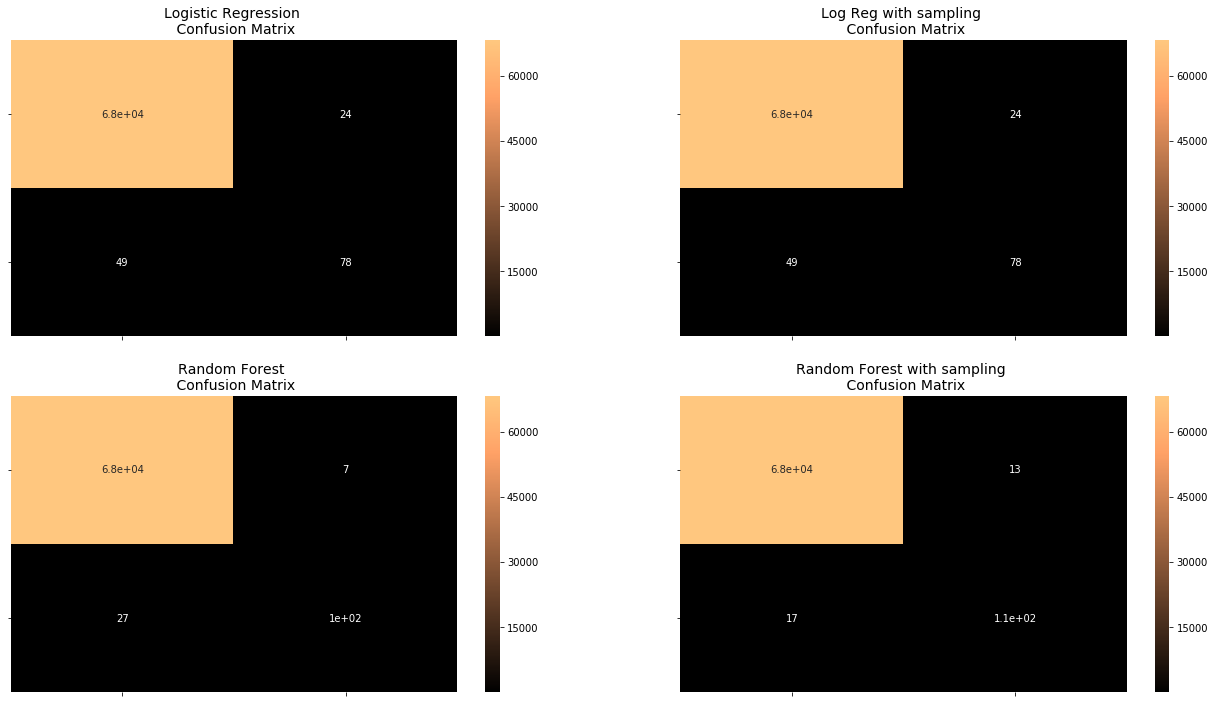

In [28]:
fig, ax = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(cf_lr, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(cf_lr_re, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("Log Reg with sampling \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(cf_rf, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Random Forest \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(cf_rf_re, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("Random Forest with sampling \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)


plt.show()

Probably convert the confusion matrix to like a normalised version so we can compare

## Try ensemble learning now

In [ ]:
# Bagged Decision Trees for Classification
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cart = DecisionTreeClassifier()
num_trees = 100
model_bc = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model_bc, X, Y, cv=kfold)
print(results.mean())

In [ ]:
#Bagged Random Forest
seed = 7
num_trees = 100
max_features = 3
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

In [25]:
#Basic Ensemble of the 3 classifiers
model_ensemble = VotingClassifier(estimators=[('lr', model_lr), ('lr_re', model_lr_re), ('rf', model_rf)], voting='hard')
model_ensemble.fit(X_train,y_train)
model_ensemble.score(X_test,y_test)

predicted = model_ensemble.predict(X_test)

# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)
print("F SCORE", f1_score(y_test, predicted))

C:\Users\smart\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\smart\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     68238
         1.0       0.75      0.68      0.71       116

   micro avg       1.00      1.00      1.00     68354
   macro avg       0.88      0.84      0.86     68354
weighted avg       1.00      1.00      1.00     68354

Confusion matrix:
 [[68212    26]
 [   37    79]]
F SCORE 0.7149321266968326


In [27]:
#Basic Ensemble of the 3 classifiers
model_ensemble_4 = VotingClassifier(estimators=[('lr', model_lr), ('lr_re', model_lr_re), ('rf', model_rf), ('rf_re', model_rf_re)],
                                  voting='hard')
model_ensemble_4.fit(X_train,y_train)
model_ensemble_4.score(X_test,y_test)

predicted = model_ensemble_4.predict(X_test)

# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)
print("F SCORE", f1_score(y_test, predicted))

C:\Users\smart\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\smart\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     68238
         1.0       0.93      0.66      0.77       116

   micro avg       1.00      1.00      1.00     68354
   macro avg       0.96      0.83      0.88     68354
weighted avg       1.00      1.00      1.00     68354

Confusion matrix:
 [[68232     6]
 [   40    76]]
F SCORE 0.7676767676767676
